In [84]:
import sympy as sp
from sympy import pprint, simplify, expand, latex
from IPython.display import display
from fractions import Fraction
sp.init_printing(
    use_latex=True,
    pretty_print=True,
    use_unicode=True,
    latex_mode="equation",
    fontsize=48)

from IPython.display import HTML

from sympy import Function, dsolve, Derivative, checkodesol, Eq, init_printing

# Set global font size using latex mode

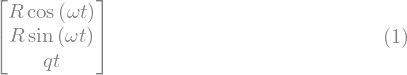

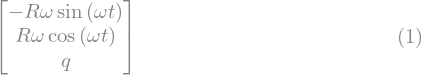

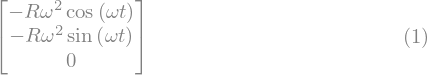

曲率


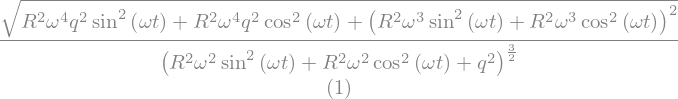

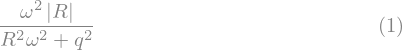

挠率


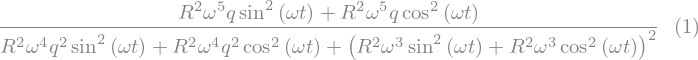

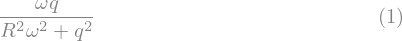

In [48]:
# 习题5

R, w, q, t = sp.symbols('R,\omega,q,t', real=True)

r = sp.Matrix([R*sp.cos(w*t), R*sp.sin(w*t), q*t])
v = sp.diff(r, t)
a = sp.diff(v, t)
aa = sp.diff(a, t)

display(r)
display(v)
display(a)

kappa = (v.cross(a).norm()) / v.norm()**3
print("曲率")
display(kappa)
display(simplify(kappa))

tau = (v.cross(a)).dot(aa) / (v.cross(a)).norm()**2
print("挠率")
display(tau)
display(simplify(tau))

# 习题7

## 补充：多元函数的级数展开

假设多元函数$f(\mathbf{x})=f(x_{1},x_{2},\cdots,x_{n})$在点$\mathbf{a}$附近的领域内连续，其泰勒级数可以展开为
$$
f(\mathbf{x})
=f(\mathbf{a})+\left(\mathbf{h}\cdot\nabla\right)f(\mathbf{a})+\frac{1}{2!}(\mathbf{h}\cdot\nabla)^{2}f(\mathbf{a})
+\cdots+\frac{1}{m!}(\mathbf{h}\cdot\nabla)^{m}f(\mathbf{a})+R_{m}(\mathbf{h}),
$$
其中$\mathbf{h}\equiv\mathbf{x}-\mathbf{a}$是一个小的增量。
$\nabla\equiv\left(\partial_{x_{1}},\cdots,\partial_{x_{n}}\right)$是微分算子。
$\mathbf{h}\cdot\nabla\equiv\left(h_{1}\partial_{x_{1}},\cdots,h_{n}\partial_{x_{n}}\right)$是方向导数的微分算子。
对于一阶项，我们有$\left(\mathbf{h}\cdot\nabla\right)f(\mathbf{a})=\nabla{f}(\mathbf{a})\cdot\mathbf{h}$, 即在$f$在$\mathbf{a}$的导数与$\mathbf{h}$的内积。
对于二阶项，
$$
\frac{1}{2!}\left(\mathbf{h}\cdot\nabla)^{2}f(\mathbf{a}\right)
=\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\frac{\partial^{2}f(\mathbf{a})}{\partial{x}_{i}\partial{x}_{j}}h_{i}h_{j}
=\frac{1}{2}\mathbf{h}^{T}H(\mathbf{a})\mathbf{h},
$$
其中$H(\mathbf{a})$是函数在$\mathbf{a}$点的Hessian矩阵，$H_{ij}\equiv\frac{\partial{f}(\mathbf{a})}{\partial{x}_{i}\partial{x}_{j}}$.


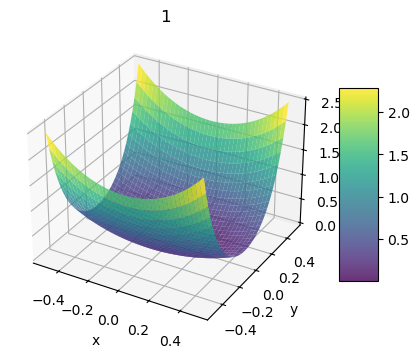

In [43]:
# 习题7

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# grid data
x = np.linspace(-0.5, 0.5, 40)
y = np.linspace(-0.5, 0.5, 40)
X, Y = np.meshgrid(x, y)
Z = np.exp(X**2 + 4*Y**2) - 1 

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

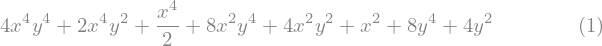

In [45]:
x, y, z = sp.symbols(r"x,y,z", real=True)

f = sp.exp(x**2 + 4*(y**2)) - 1

taylor_expansion = f.series(x, 0.0, 6).removeO().series(y, 0.0, 6).removeO()
display(expand(taylor_expansion))

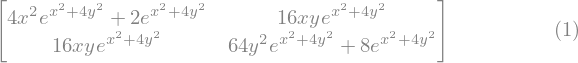

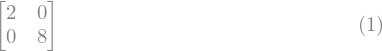

In [ ]:
# verify the expansion by hand calculation

fx = sp.diff(f, x)
value = fx.subs(x, 0)
display(fx, value)

fy = sp.diff(f, y)
value = fy.subs(y, 0)
display(fy, value)

# Hessian matrix
h = sp.hessian(f, (x, y))
value = h.subs({x: 0, y: 0})
display(h, value)

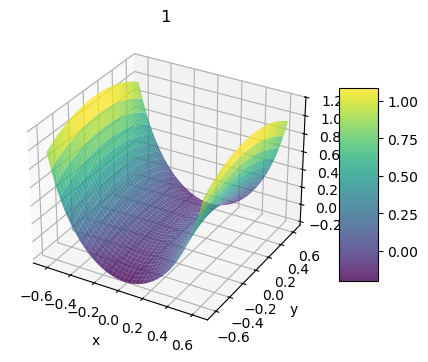

In [53]:
# grid data
PI = 0.2*np.pi
x = np.linspace(-PI, PI, 40)
y = np.linspace(-PI, PI, 40)
X, Y = np.meshgrid(x, y)
Z = np.log(np.cos(Y)) - np.log(np.cos(2*X))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

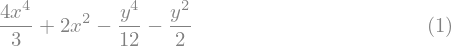

In [55]:
x, y, z = sp.symbols(r"x,y,z", real=True)

f = sp.log(sp.cos(y)) - sp.log(sp.cos(2*x))
taylor_expansion = f.series(x, 0.0, 6).removeO().series(y, 0.0, 6).removeO()

display(expand(taylor_expansion))

# 习题9

(i)
在新的坐标下相当于做了变换$y\rightarrow{r}, x\rightarrow{z}$.
且因为$z=f(r)$, 从而
$$
y^{\prime}\equiv\frac{dy}{dx}\rightarrow
\frac{dr}{dz}=\frac{1}{f^{\prime}(r)}.
$$
因此
$$
y^{\prime\prime}\rightarrow
\frac{d^{2}r}{dz^{2}}
=\frac{dr}{dz}\left[\frac{1}{f^{\prime}(r)}\right]
=-\frac{1}{\left[f^{\prime}(r)\right]^{2}}\frac{d\left[f^{\prime}(r)\right]}{dz}.
$$
则根据上一题，
$$
\mathcal{K}
=-\frac{y^{\prime\prime}}{y\left[1+(y^{\prime})^{2}\right]^{2}}\rightarrow
\frac{\frac{1}{\left[f^{\prime}(r)\right]^{2}}\frac{d\left[f^{\prime}(r)\right]}{dz}}{r\left[1+\left(\frac{dr}{dz}\right)^{2}\right]^{2}}
=\frac{\frac{1}{\left[f^{\prime}(r)\right]^{2}}\frac{d\left[f^{\prime}(r)\right]}{dz}\cdot\left(\frac{dz}{dr}\right)^{4}}{r\left[1+\left(\frac{dr}{dz}\right)^{2}\right]^{2}\cdot\left(\frac{dz}{dr}\right)^{4}}
=\frac{\frac{d\left[f^{\prime}(z)\right]}{dz}\cdot\left(\frac{dz}{dr}\right)}{r\left[\left(\frac{dz}{dr}\right)^{2}+1\right]^{2}}
=\frac{f^{\prime}(r)\cdot{f}^{\prime\prime}(r)}{r\left\{1+\left[f^{\prime}(r)\right]^{2}\right\}^{2}}.
$$

(ii) 如果只考虑上半球，显然$z=f(r)=\sqrt{R^{2}-r^{2}}$.

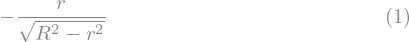

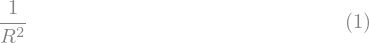

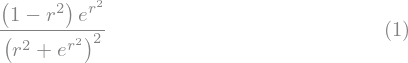

In [75]:
# 9(ii)

R, r = sp.symbols(r"R,r", real=True)

f = sp.sqrt(R**2 - r**2)
fp = sp.diff(f, r)
K = (fp * sp.diff(fp, r)) / (r*(1 + (fp)**2)**2)

display(f, fp)
display(simplify(K))

# 9(iii)
f = sp.exp(-(r**2) / 2)
fp = sp.diff(f, r)

K = (fp * sp.diff(fp, r)) / (r*(1 + (fp)**2)**2)

display(f, fp)
display(simplify(K))

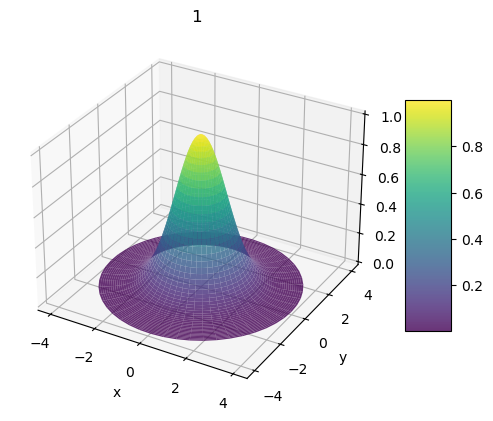

In [76]:
# 9(iii)

r = np.linspace(0, 4, 50)
t = np.linspace(0, 2*np.pi, 50)

rmg, tmg = np.meshgrid(r, t)
x = rmg * np.cos(tmg)
y = rmg * np.sin(tmg)
# z = np.sqrt(4 - umg**2)
z = np.exp(-0.5*(rmg**2))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1')
# ax.set_box_aspect([1, 1, 1])

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

# 习题10

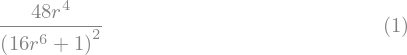

In [77]:
# 10

r = sp.symbols(r"r", real=True)

f = r**4
fp = sp.diff(f, r)
K = (fp * sp.diff(fp, r)) / (r*(1 + (fp)**2)**2)

display(f, fp)
display(simplify(K))

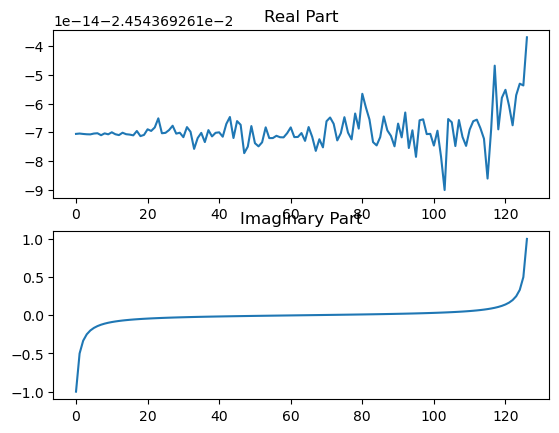

[-0.9997991943200191, -0.49959834024253624, -0.3327307226478212, -0.24919629297154233, -0.1989950024821169, -0.16546013555763273, -0.14144878581934375, -0.12338947512159662, -0.1092980265091408, -0.09798391336389403, -0.08868950898343599, -0.08090971133852946, -0.07429481791237086, -0.06859502557980511, -0.06362713050682474, -0.05925371556053247, -0.05536968331238039, -0.051893278014026364, -0.04875994271262067, -0.04591801920555056, -0.04332567655359576, -0.04094867724621843, -0.038758726080108455, -0.03673223179148345, -0.03484936586966203, -0.03309333854001967, -0.03144983561162487, -0.029906575971568355, -0.02845296060271764, -0.027079791767575474, -0.025779046512273307, -0.024543692606170977, -0.023367537913375556, -0.022245106310881953, -0.021171534841571582, -0.020142487970507977, -0.019154085706047586, -0.0182028430288994, -0.01728561859631119, -0.016399571095100783, -0.015542121934067035, -0.014710923215521053, -0.013903830122558494, -0.01311887701535654, -0.012354256654828494

In [49]:
import numpy as np

L = 128
nr = []
ni = []
for n in range(1, L):
    res = 0.0
    for m in range(L):
        k = 2*np.pi*m / L
        res += k*np.exp(1.j*k*n)

    nr.append(np.real(res / L))
    ni.append(np.imag(res / L))

import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(nr)
plt.title('Real Part')
plt.subplot(2, 1, 2)
plt.plot(ni)
plt.title('Imaginary Part')
plt.show()

print(ni)

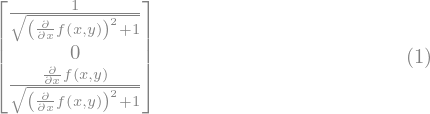

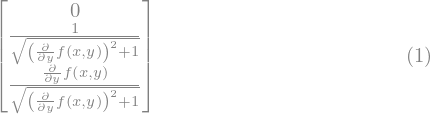

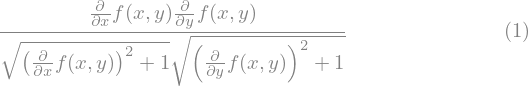

First fundamental form:


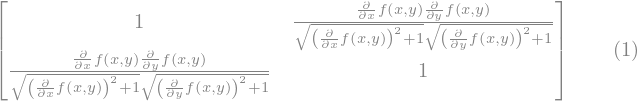

Second fundamental form:


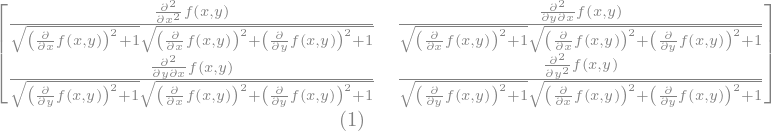

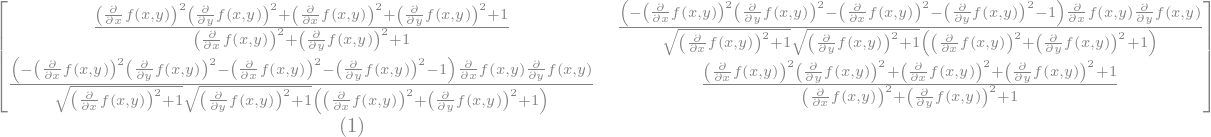

Shape operator:


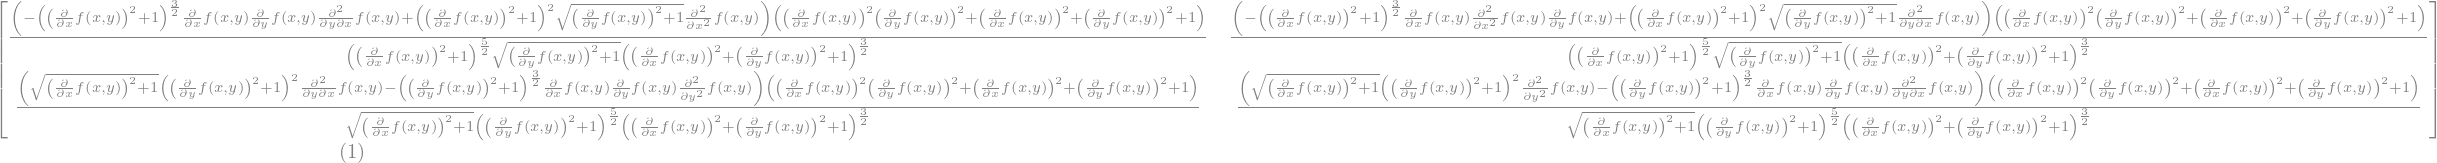

Simplified shape operator at (0,0):


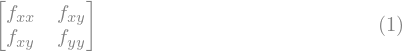

In [ ]:
# 习题15

x, y = sp.symbols(r"x,y", real=True)

f = sp.Function('f')(x, y)
fpx, fpy = sp.diff(f, x), sp.diff(f, y)

# define the tangent plane basis
e1 = (1 / sp.sqrt(1 + fpx**2)) * sp.Matrix([1, 0, fpx])
e2 = (1 / sp.sqrt(1 + fpy**2)) * sp.Matrix([0, 1, fpy])
# define the normal vector
n = (1 / sp.sqrt(1 + fpx**2 + fpy**2)) * sp.Matrix([-fpx, -fpy, 1])
nn = sp.Matrix([-fpx, -fpy, 1])
display(e1, e2)
display(e1.dot(e2))

# first fundamental form / metric tensor
I = sp.Matrix([
    [e1.dot(e1), e1.dot(e2)],
    [e2.dot(e1), e2.dot(e2)]])
print("First fundamental form:")
display(simplify(I))

# second fundamental form
sx, sy = -sp.diff(n, x), -sp.diff(n, y)
II = sp.Matrix([
    [e1.dot(sx), e1.dot(sy)],
    [e2.dot(sx), e2.dot(sy)]])
print("Second fundamental form:")
display(simplify(II))

# shape operator
S = II * I.inv()
print("Shape operator:")
display(simplify(S))

# define second derivatives
fxx = sp.Symbol('f_{xx}') 
fyy = sp.Symbol('f_{yy}')
fxy = sp.Symbol('f_{xy}')

# build substitution dictionary
# ∂f/∂x = ∂f/∂y = 0 at (0,0)
subs_dict = {
    fpx: 0,
    fpy: 0,
    sp.diff(fpx, x): fxx,
    sp.diff(fpx, y): fxy,
    sp.diff(fpy, x): fxy,
    sp.diff(fpy, y): fyy,
}

S_simplified = sp.simplify(S.subs(subs_dict))
print("Simplified shape operator at (0,0):")
display(S_simplified)

First fundamental form:


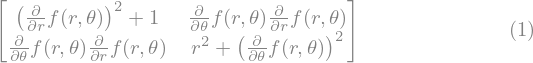

Second fundamental form:


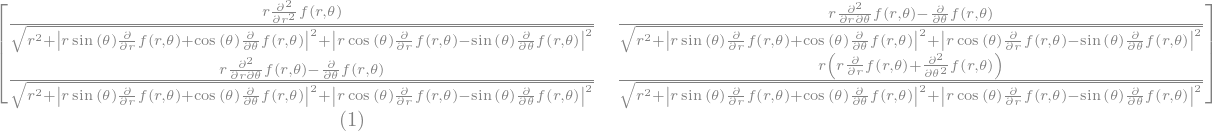

Shape operator:


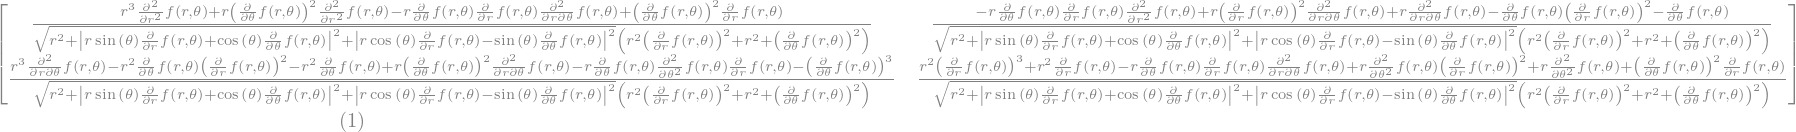

Simplified shape operator:


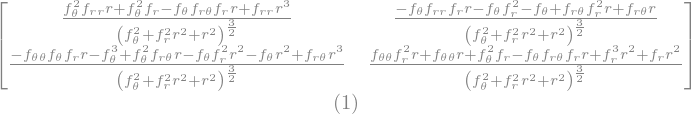

Gaussian curvature:


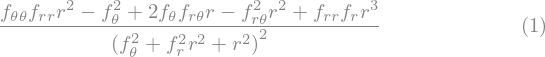

In [ ]:
# 习题18

r, t = sp.symbols(r"r,\theta", real=True)

f = sp.Function('f')(r, t)
R = sp.Matrix([r*sp.cos(t), r*sp.sin(t), f])

# tangent vectors
er, et = sp.diff(R, r), sp.diff(R, t)
er_normalized, et_normalized = er.normalized(), et.normalized()
n = er.cross(et)
n_normalized = n.normalized()

# first fundamental form / metric tensor
I = sp.Matrix([
    [er.dot(er), er.dot(et)],
    [et.dot(er), et.dot(et)]])
print("First fundamental form:")
display(simplify(I))

sr, st = -sp.diff(n_normalized, r), -sp.diff(n_normalized, t)
# second fundamental form
II = sp.Matrix([
    [er.dot(sr), er.dot(st)],
    [et.dot(sr), et.dot(st)]])
print("Second fundamental form:")
display(simplify(II))

# shape operator
S = II * I.inv()
print("Shape operator:")
display(simplify(S))

# define second derivatives
fr, ft = sp.symbols(r"f_{r},f_{\theta}", real=True)
frr = sp.Symbol(r'f_{rr}', real=True) 
ftt = sp.Symbol(r'f_{\theta\theta}', real=True)
frt = sp.Symbol(r'f_{r\theta}', real=True)
# build substitution dictionary
subs_dict = {
    sp.diff(f, r): fr,
    sp.diff(f, t): ft,
    sp.diff(sp.diff(f, r), r): frr,
    sp.diff(sp.diff(f, r), t): frt,
    sp.diff(sp.diff(f, t), r): frt,
    sp.diff(sp.diff(f, t), t): ftt,
}

simplified_S = S.subs(subs_dict)
print("Simplified shape operator:")
display(simplify(simplified_S))

kappa = simplified_S.det()
print("Gaussian curvature:")
display(simplify(kappa))